In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Cleaning

In [3]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

for c in list(data.dtypes[data.dtypes == 'object'].index):
    data[c] = data[c].str.lower().str.replace(' ', '_')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


### EDA

<Axes: xlabel='median_house_value', ylabel='Count'>

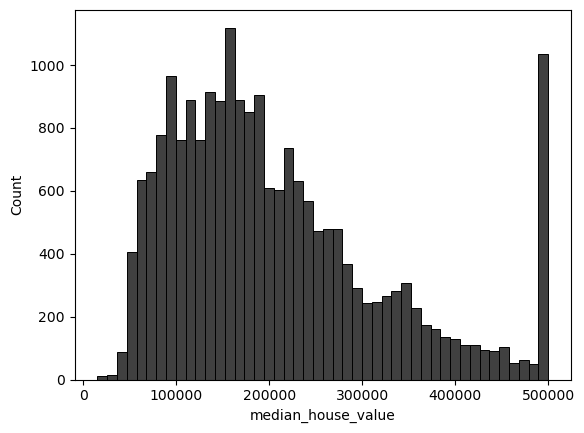

In [4]:
sns.histplot(data['median_house_value'], color='black')

### Preparing the dataset

In [5]:
df = data[(data['ocean_proximity'] == 'inland' )| (data['ocean_proximity'] == '<1h_ocean')]

features = ['latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value'
]
categorical = ['ocean_proximity']

df = df[features]

In [6]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1:
There's one feature with missing values. What is it?

In [7]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

answer : total_bedrooms

### Question 2:
What's the median (50% percentile) for variable 'population'?

In [8]:
df['population'].median()

1195.0

In [9]:
np.random.seed(42)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = int(n - (n_val + n_test))

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [10]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306


### Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?

Options:

    With 0
    With mean
    Both are equally good


In [11]:
base = ['latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income'
]

In [12]:
# function for preparing our dataset
def prepare_dataset(dataframe, fillna_value):
    X = dataframe.copy()
    
    X = X[base]
    X = X.fillna(fillna_value)
    X = X.values
    
    return X


# function for training linear regression model
def train_linear_regression(X,y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]


#function for calculating root mean squared error
def rmse(actual, predicted):
    
    error = actual-predicted
    er_sq = error**2
    mse = er_sq.mean()
    
    return np.sqrt(mse)

#### filling missing values with zeros

In [13]:
X_train = prepare_dataset(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_dataset(df_val, 0)
y_pred = w0 + X_val.dot(w)

np.round(rmse(y_val, y_pred),2)

0.34

#### filling missing values with mean of total bedrooms

In [14]:
mean_total_bedroom = df_train['total_bedrooms'].mean()

X_train_with_0 = prepare_dataset(df_train, mean_total_bedroom)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_dataset(df_val, mean_total_bedroom)
y_pred = w0 + X_val.dot(w)
np.round(rmse(y_val, y_pred),2)

0.34

##### Both 0 and mean turned out to be equally good

## Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001


In [15]:
# funtion to train a linear regression model with regularization

def train_regularized_linear_rergression(X, y, r):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [16]:
scores =  []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    X_train =  prepare_dataset(df_train, 0)
    w0, w = train_regularized_linear_rergression(X_train, y_train, r)

    X_val = prepare_dataset(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    rmse_score = np.round(rmse(y_val, y_pred), 2)
    
    scores.append({'r': r, 'score':rmse_score})
scores
    

[{'r': 0, 'score': 0.34},
 {'r': 1e-06, 'score': 0.34},
 {'r': 0.0001, 'score': 0.34},
 {'r': 0.001, 'score': 0.34},
 {'r': 0.01, 'score': 0.34},
 {'r': 0.1, 'score': 0.34},
 {'r': 1, 'score': 0.34},
 {'r': 5, 'score': 0.35},
 {'r': 10, 'score': 0.35}]

## Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    0.5
    0.05
    0.005
    0.0005

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [17]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()
    
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_dataset(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val =  prepare_dataset(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    
    rmse_score = rmse(y_val, y_pred)
    scores.append(rmse_score)

round(np.std(scores),3)

0.005

## Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.13
    0.23
    0.33
    0.43


In [18]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

In [19]:
X_full_train = prepare_dataset(df_full_train, 0)
w0, w = train_regularized_linear_rergression(X_full_train, y_full_train, 0.001)

X_test = prepare_dataset(df_test, 0)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.34232150040385056